# Final Project - Machine Learning
---
**Objectives**  
This machine learning project aims to build a predictive model to classify whether an insurance claims should be proceeded or not.

# **Import Libraries**

In [122]:
# Define Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.options.display.max_columns = 200
warnings.filterwarnings('ignore')

# Import model libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import f_oneway, chi2_contingency
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model Evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# Saving Models
import pickle

# **Data Loading**

## Load Data

In [2]:
df_raw = pd.read_csv('car_insurance.csv')

df_raw

,Unnamed: 0,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,crack,0.0
1,1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,tire flat,1.0
2,2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter,1.0
3,3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,lamp broken,1.0
4,4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,104995,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,suv,0.0,0.0,31885,9000.0,2,0,0,tire flat,0.0
104996,104996,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,sedan,1.0,0.0,32277,10000.0,0,0,0,glass shatter,1.0
104997,104997,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,sedan,1.0,0.0,34800,11000.0,0,0,0,lamp broken,1.0
104998,104998,984879,40-64,female,20-29y,high school,working class,0.483571,1.0,before 2015,hatchback,0.0,0.0,10238,10000.0,0,0,0,dent,0.0


We can see that we have successfully loaded data into `df_raw`. The dataset contains 105000 rows and 20 columns.

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           105000 non-null  int64  
 1   id                   105000 non-null  int64  
 2   age                  105000 non-null  object 
 3   gender               105000 non-null  object 
 4   driving_experience   105000 non-null  object 
 5   education            105000 non-null  object 
 6   income               105000 non-null  object 
 7   credit_score         105000 non-null  float64
 8   vehicle_ownership    105000 non-null  float64
 9   vehicle_year         105000 non-null  object 
 10  type_of_vehicle      105000 non-null  object 
 11  married              105000 non-null  float64
 12  children             105000 non-null  float64
 13  postal_code          105000 non-null  int64  
 14  annual_mileage       105000 non-null  float64
 15  speeding_violatio

We can see that there are 6 columns with the float64 data type, 6 columns with the int64 data type, and 8 columns with the object data type. The column names are descriptive and consistent. So, we don't need to rename the columns. However, there is 1 column (`Unnamed: 0`) that seems redundant because it has no purpose in the data and we need to drop it.

## Drop Unnamed Column

In [4]:
df_raw_new = df_raw.drop('Unnamed: 0', axis=1)

df_raw_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   105000 non-null  int64  
 1   age                  105000 non-null  object 
 2   gender               105000 non-null  object 
 3   driving_experience   105000 non-null  object 
 4   education            105000 non-null  object 
 5   income               105000 non-null  object 
 6   credit_score         105000 non-null  float64
 7   vehicle_ownership    105000 non-null  float64
 8   vehicle_year         105000 non-null  object 
 9   type_of_vehicle      105000 non-null  object 
 10  married              105000 non-null  float64
 11  children             105000 non-null  float64
 12  postal_code          105000 non-null  int64  
 13  annual_mileage       105000 non-null  float64
 14  speeding_violations  105000 non-null  int64  
 15  duis             

We've successfully dropped the unnecessary (`Unnamed: 0`) column.

## Check Missing Values

In [5]:
# Checking num of missing values in every columns
df_raw_new.isna().sum().sort_values(ascending=False)

id                     0
married                0
issue                  0
past_accidents         0
duis                   0
speeding_violations    0
annual_mileage         0
postal_code            0
children               0
type_of_vehicle        0
age                    0
vehicle_year           0
vehicle_ownership      0
credit_score           0
income                 0
education              0
driving_experience     0
gender                 0
outcome                0
dtype: int64

There are no missing values in every columns. Therefore, we don't need to handle them.

## Check Duplicated Values

In [6]:
# Checking any duplicated rows
df_raw_new['id'].duplicated().sum()

6515

As the `id` column serves as the unique identifier in the dataset, we need to ensure that there are no duplicated data. In this dataset, we can see that there are 6515 duplicated `id`. And since the number of duplicated data is not significant, we can drop it.

## Describe Data

In [7]:
# Describing the numeric data
df_raw_new.describe().T

,count,mean,std,min,25%,50%,75%,max
id,105000.0,394931.295905,279694.106053,101.00000,156351.750000,354679.500000,598602.250000,999976.000000
credit_score,105000.0,0.602173,0.138045,0.06688,0.514876,0.601112,0.703216,0.954075
vehicle_ownership,105000.0,0.827038,0.378216,0.00000,1.000000,1.000000,1.000000,1.000000
married,105000.0,0.584143,0.492871,0.00000,0.000000,1.000000,1.000000,1.000000
children,105000.0,0.520000,0.499602,0.00000,0.000000,1.000000,1.000000,1.000000
postal_code,105000.0,18045.439267,16709.040449,10238.00000,10238.000000,10238.000000,22957.750000,92101.000000
annual_mileage,105000.0,11061.228571,2972.355482,2000.00000,9000.000000,11000.000000,13000.000000,21000.000000
speeding_violations,105000.0,0.675676,1.383678,0.00000,0.000000,0.000000,1.000000,20.000000
duis,105000.0,0.129733,0.589714,0.00000,0.000000,0.000000,0.000000,6.000000
past_accidents,105000.0,0.549314,1.402809,0.00000,0.000000,0.000000,0.000000,15.000000


We can see that several columns exhibit a high standard deviation, indicating an extensive range in the data. This observation aligns with the wide range evident in both the minimum and maximum values. It suggests the presence of outliers within the dataset.

In [8]:
# Describing the categorical data
df_raw.describe(include='object').T

,count,unique,top,freq
age,105000,4,40-64,33716
gender,105000,2,male,65317
driving_experience,105000,4,20-29y,37493
education,105000,3,high school,46590
income,105000,4,upper class,51271
vehicle_year,105000,2,before 2015,57511
type_of_vehicle,105000,4,sports car,34592
issue,105000,6,glass shatter,17659


We can see that now there are 8 categorical columns within the data. Every categorical column has unique value counts below 6, indicating low cardinality.

# **Exploratory Data Analysis**

## Columns Distributions **!!!**

### Plot Distribution Functions

In [9]:
# Function to plot numeric distribution (histogram & boxplot)
def plot_distribution(col, colName, color='indianred'):
    plt.figure(figsize=(12,5))

    # Plot Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_raw[col], kde=True, color=color, bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_raw, x=col, color=color)
    plt.title('Boxplot')

    plt.suptitle(f'{colName} Distribution')
    plt.show()

In [10]:
# Function to plot categorical distribution (barplot & piechart)
def plot_count(col, colName):
    labels = df_raw[col].value_counts().index.tolist()
    sizes = df_raw[col].value_counts().values.tolist()

    plt.figure(figsize=(12,5))

    # Barplot
    plt.subplot(1, 2, 1)
    sns.barplot(x=labels, y=sizes)
    plt.xticks(rotation=30)
    plt.title('Bar Chart')

    # Piechart
    plt.subplot(1, 2, 2)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Pie Chart')

    plt.suptitle(f'{colName} Distribution')
    plt.show()

In [11]:
df_raw_new.columns

Index(['id', 'age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'type_of_vehicle',
       'married', 'children', 'postal_code', 'annual_mileage',
       'speeding_violations', 'duis', 'past_accidents', 'issue', 'outcome'],
      dtype='object')

### Age Distribution

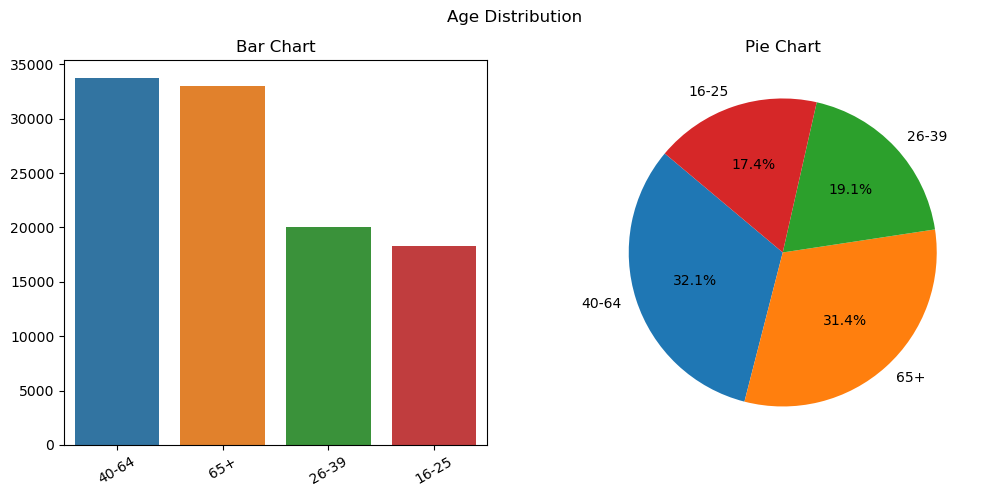

In [12]:
# Display the column distribution
plot_count('age', 'Age')

### Gender Distribution

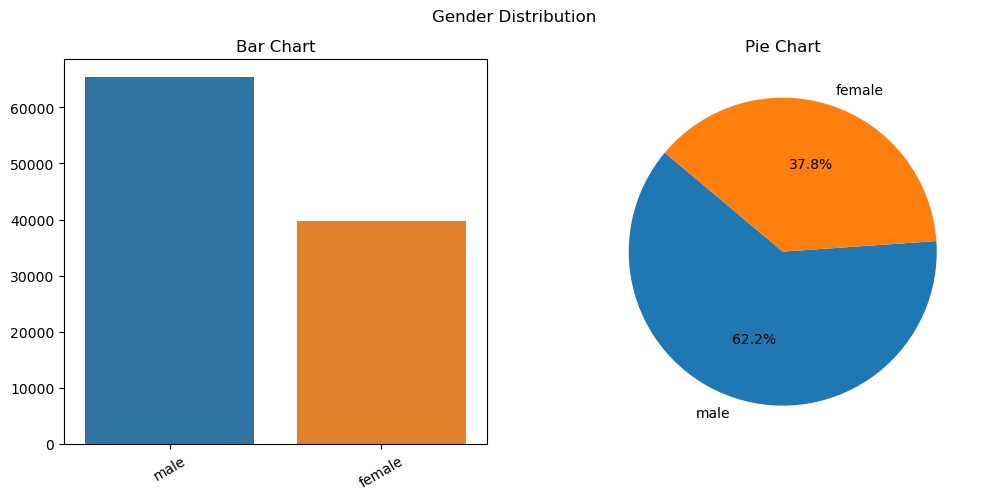

In [13]:
# Display the column distribution
plot_count('gender', 'Gender')

### Driving Experience Distribution

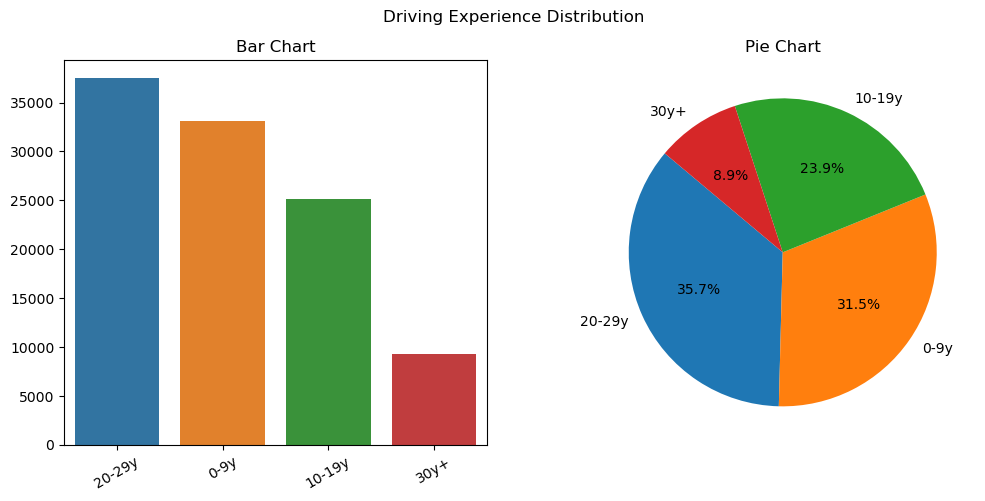

In [14]:
# Display the column distribution
plot_count('driving_experience', 'Driving Experience')

### Education Distribution

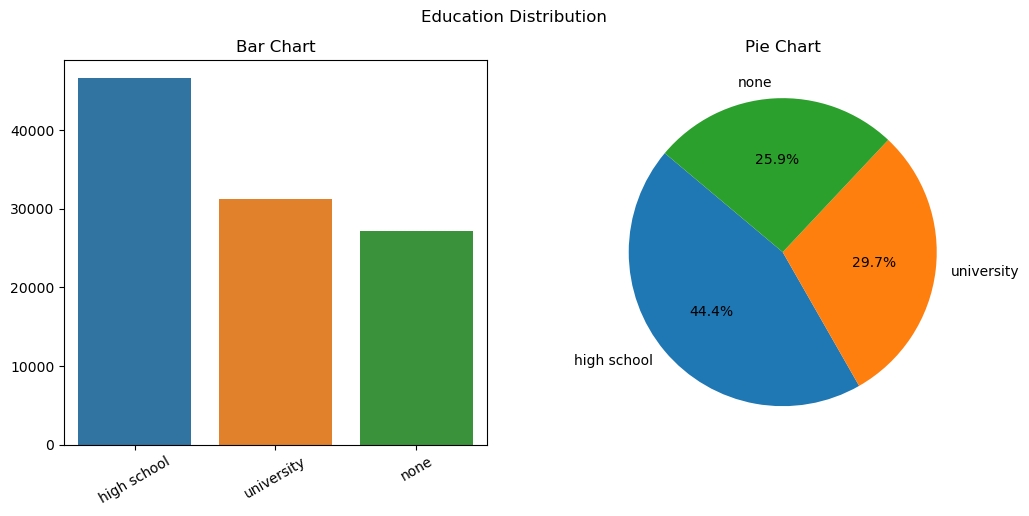

In [15]:
# Display the column distribution
plot_count('education', 'Education')

### Income Distribution

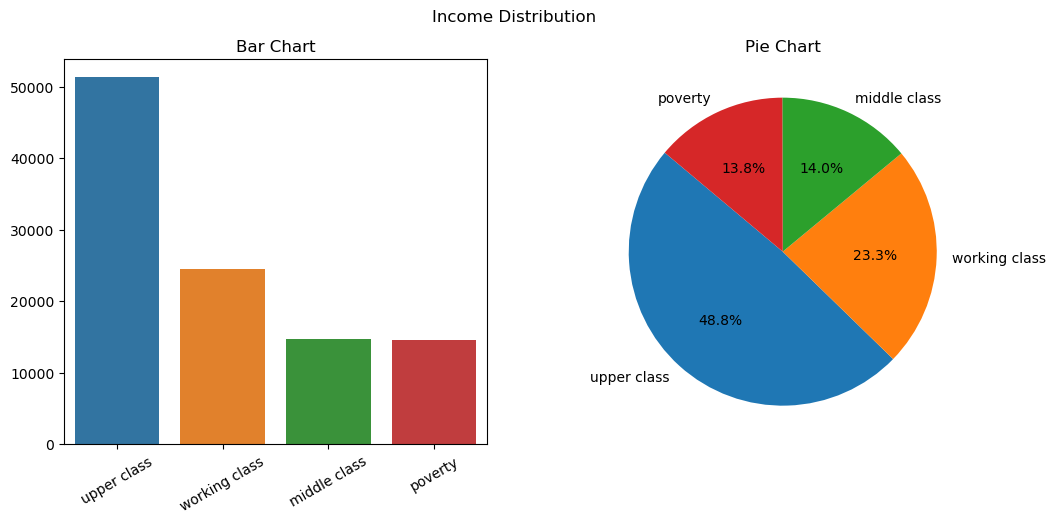

In [16]:
# Display the column distribution
plot_count('income', 'Income')

### Credit Score Distribution

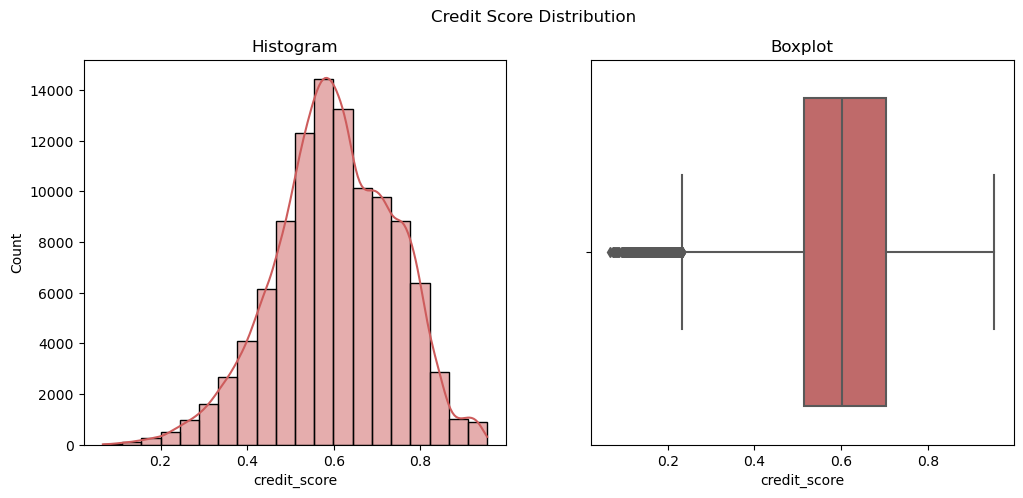

In [17]:
# Display the column distribution
plot_distribution('credit_score', 'Credit Score', 'indianred')

### Vehicle Ownership Distribution

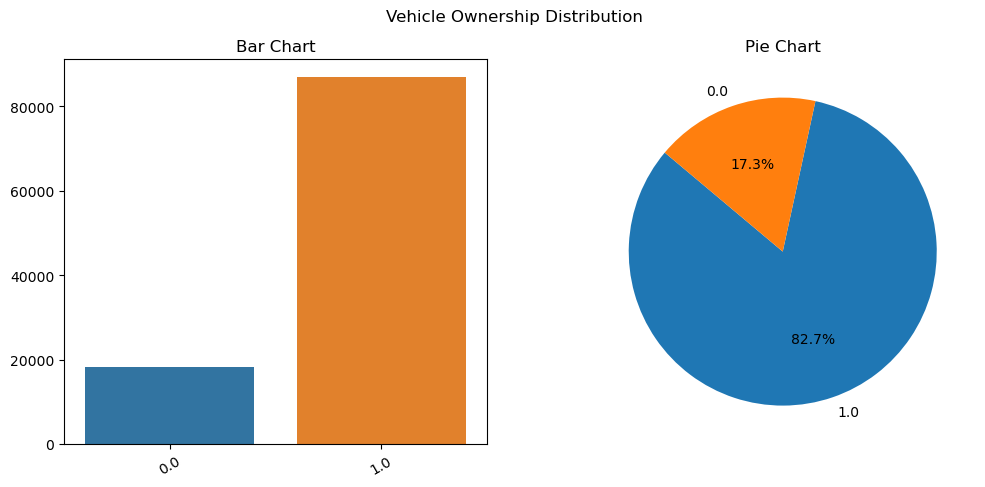

In [18]:
# Display the column distribution
plot_count('vehicle_ownership', 'Vehicle Ownership')

### Vehicle Year Distribution

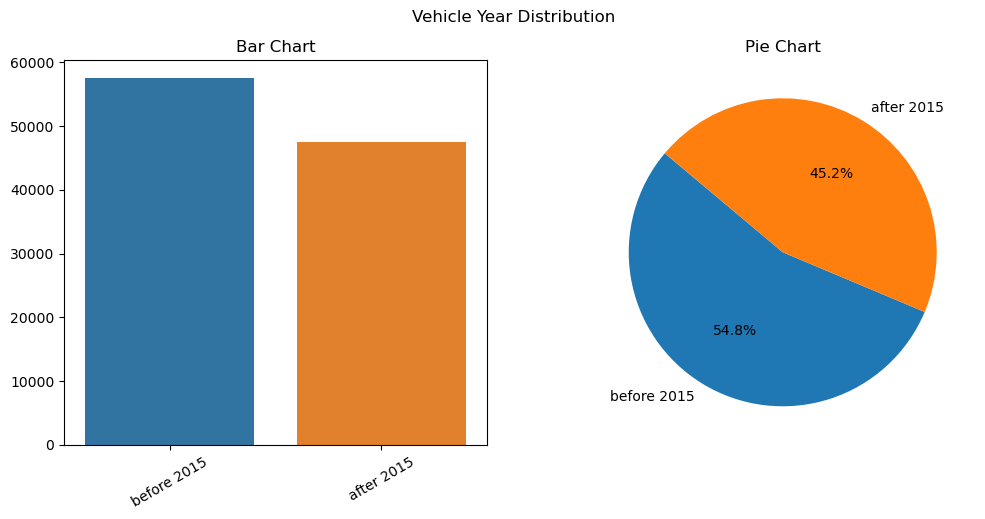

In [19]:
# Display the column distribution
plot_count('vehicle_year', 'Vehicle Year')

### Type of Vehicle Distribution

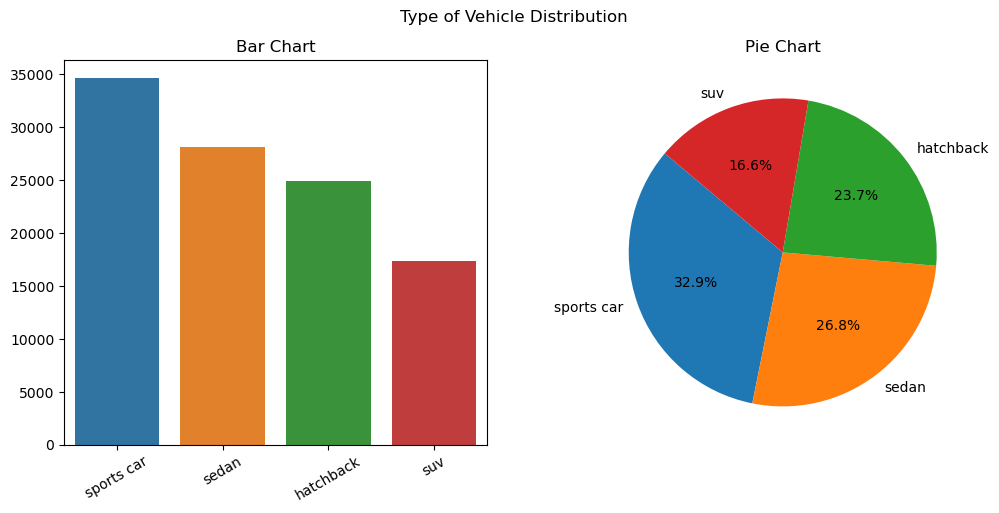

In [20]:
# Display the column distribution
plot_count('type_of_vehicle', 'Type of Vehicle')

### Married Distribution

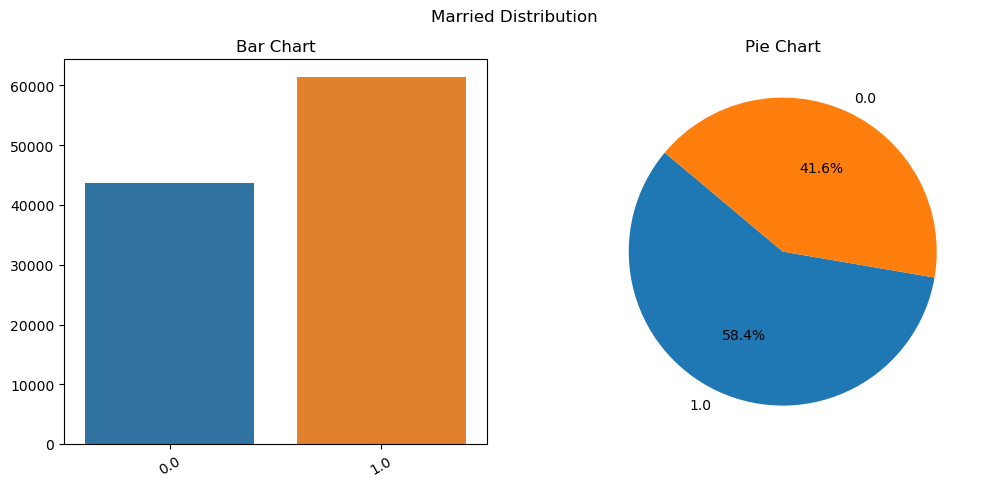

In [21]:
# Display the column distribution
plot_count('married', 'Married')

### Children Distribution

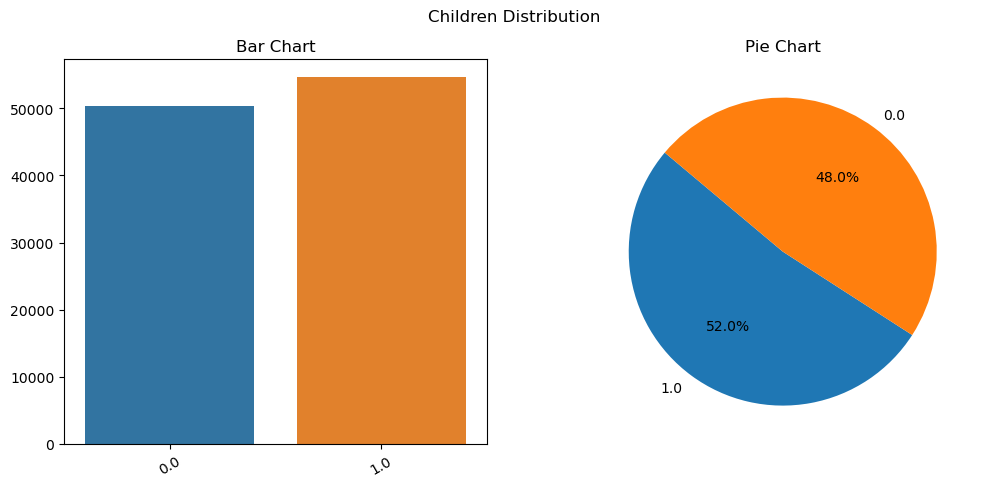

In [22]:
# Display the column distribution
plot_count('children', 'Children')

### Annual Mileage Distribution

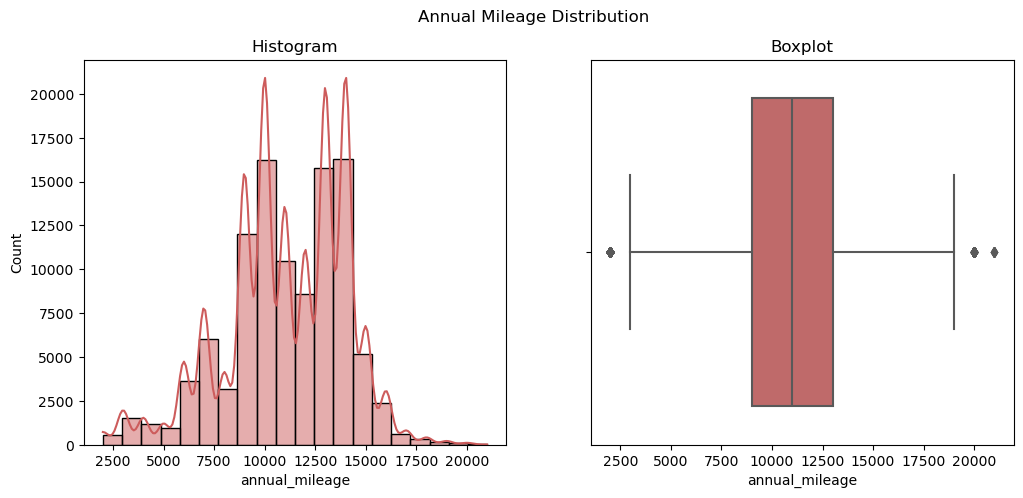

In [23]:
# Display the column distribution
plot_distribution('annual_mileage', 'Annual Mileage')

### Speeding Violations Distribution

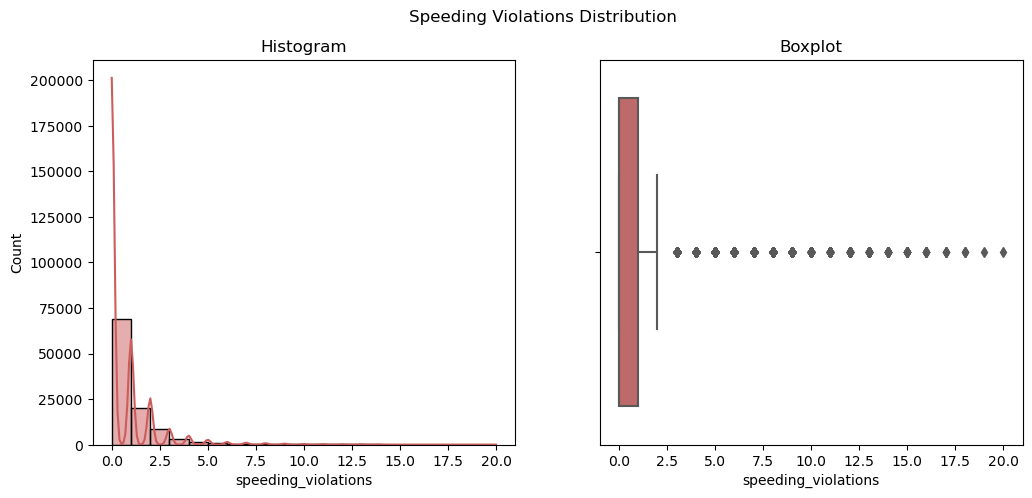

In [24]:
# Display the column distribution
plot_distribution('speeding_violations', 'Speeding Violations')

### DUIs Distribution

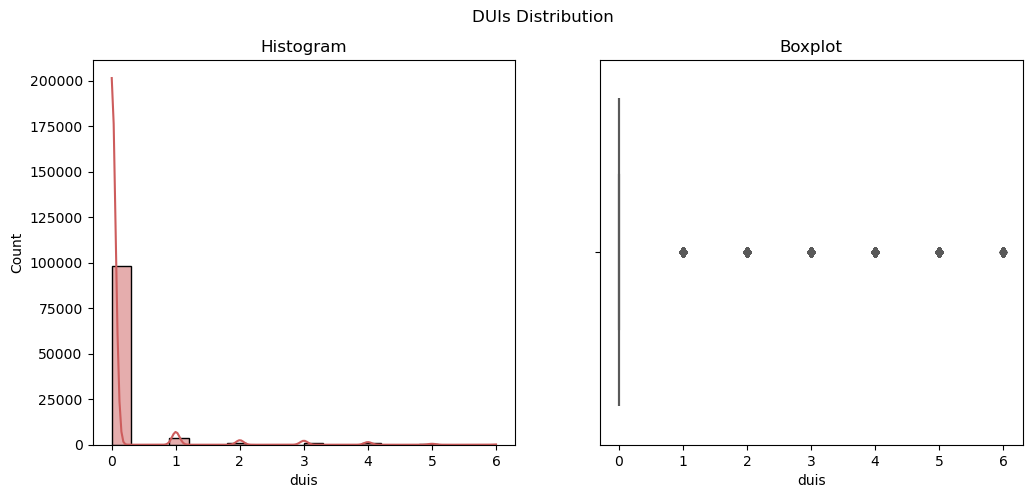

In [25]:
# Display the column distribution
plot_distribution('duis', 'DUIs')

### Past Accidents Distribution

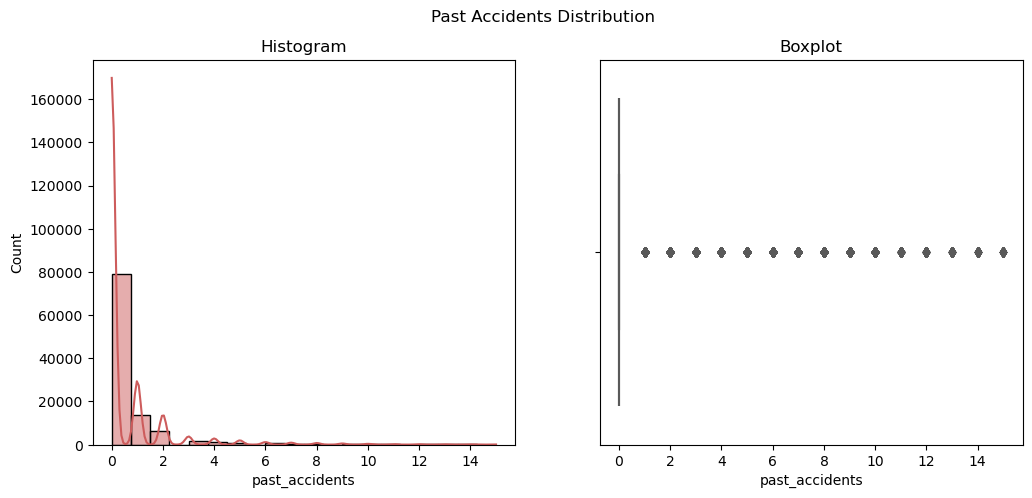

In [26]:
# Display the column distribution
plot_distribution('past_accidents', 'Past Accidents')

### Issue Distribution

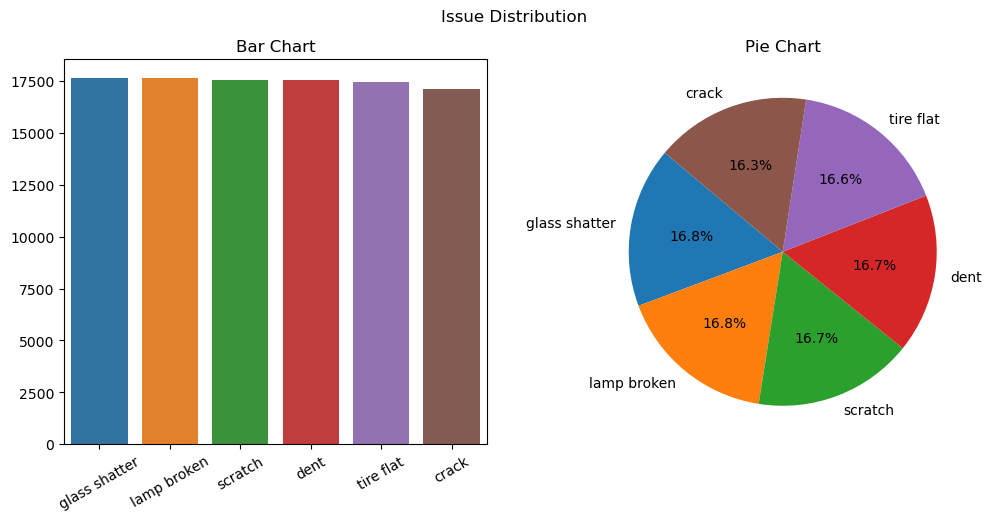

In [27]:
# Display the column distribution
plot_count('issue', 'Issue')

## Outcome Distribution

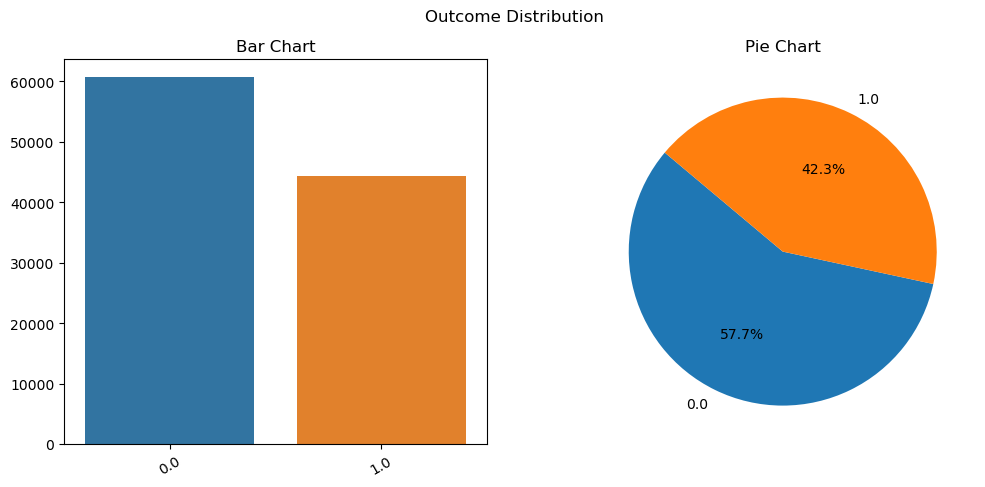

In [28]:
# Display the column distribution
plot_count('outcome', 'Outcome')

The target proportions in the data are quite balance, although there are more instances of 0 (Deny) than 1 (Accept). The difference is not that significant therefore the proportion is considered balance.

# **Feature Engineering**

## Copy the Data

In [29]:
# Copying the Data
df = df_raw_new.copy()

df

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,crack,0.0
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,tire flat,1.0
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter,1.0
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,lamp broken,1.0
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,suv,0.0,0.0,31885,9000.0,2,0,0,tire flat,0.0
104996,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,sedan,1.0,0.0,32277,10000.0,0,0,0,glass shatter,1.0
104997,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,sedan,1.0,0.0,34800,11000.0,0,0,0,lamp broken,1.0
104998,984879,40-64,female,20-29y,high school,working class,0.483571,1.0,before 2015,hatchback,0.0,0.0,10238,10000.0,0,0,0,dent,0.0


We've successfully copied the data to the `df` variable.

## Handle Cardinality

In [30]:
# Defining all the categorical columns in data
cat_cols = list(df.select_dtypes(include='object').columns)

# For every categorical column
# check the number of unique values
cardinality_list = []
for col in cat_cols:
  cardinality_list.append([col, df[col].nunique()])

pd.DataFrame(columns=['Column Name', 'Num of Unique Values',], data=cardinality_list)

,Column Name,Num of Unique Values
0,age,4
1,gender,2
2,driving_experience,4
3,education,3
4,income,4
5,vehicle_year,2
6,type_of_vehicle,4
7,issue,6


As we can see from the table, the number of unique values in each column falls below 6, indicating low cardinality. Therefore, we don't need to handle the cardinality.

## Drop Duplicated ID

In [31]:
df = df.drop_duplicates(subset='id').reset_index(drop=True)

df

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,crack,0.0
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,tire flat,1.0
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter,1.0
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,lamp broken,1.0
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98480,516906,40-64,male,20-29y,university,upper class,0.282996,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,crack,0.0
98481,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,suv,0.0,0.0,31885,9000.0,2,0,0,tire flat,0.0
98482,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,sedan,1.0,0.0,32277,10000.0,0,0,0,glass shatter,1.0
98483,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,sedan,1.0,0.0,34800,11000.0,0,0,0,lamp broken,1.0


As we can see earlier, the dataset contains several duplicated id. Therefore, we dropped the rows with duplicated id. Now, the dataset is consists of 98485 rows and 19 columns.

## Split X (Features) and y (target)

In [32]:
# Splitting between X and y
X = df.drop(['outcome', 'id'], axis=1)
y = df['outcome']

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
X.head()

X shape: (98485, 17)
y shape: (98485,)


,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue
0,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,crack
1,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,tire flat
2,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter
3,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,lamp broken
4,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter


We've successfully split the data into X (Features) and y (target).

## Split Train and Test set

In [33]:
# Splitting between Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (78788, 17)
X test shape: (19697, 17)
y train shape: (78788,)
y test shape: (19697,)


We've successfully split the data into train and test set.

## Handling Outlier

In [34]:
# Define numeric columns
num_cols = X_train.select_dtypes(include=np.number).columns.to_list()

num_skewed_vals = []
skewed_cols = []

num_normal_vals = []
normal_cols = []

# For every numeric column
# Check the skewness value and determine whether
# the distribution skewed or normal
for col in num_cols:
    skew = X_train[col].skew()
    # Normal Distribution
    if skew <= 0.5 and skew >= -0.5:
        normal_cols.append(col)
        num_normal_vals.append([col, skew])
    # Skewed Distribution
    elif skew < -0.5 or skew > 0.5:
        skewed_cols.append(col)
        num_skewed_vals.append([col, skew])

# Display Columns with Skewed Distribution
print('Columns with Skewed Distribution')
pd.DataFrame(data=num_skewed_vals, columns=['Column Name', 'Skewness'])

Columns with Skewed Distribution


,Column Name,Skewness
0,vehicle_ownership,-1.734622
1,postal_code,2.991256
2,annual_mileage,-0.508013
3,speeding_violations,3.888105
4,duis,5.576762
5,past_accidents,4.340209


We observe that 6 columns exhibit a skewed distribution: `vehicle_ownership`, `postal_code`, `annual_mileage`, `speeding_violations`, `duis`, and `past_accidents`. Outliers in each of these columns with skewed distributions will be addressed using the Winsorizer module using the IQR method. However, based on our previous EDA, we have noted that the `vehicle_ownership`, `duis`, and `past_accidents` columns have low variation and may actually follow a normal distribution. Therefore, these two columns will be handled by the Winsorizer module using the Gaussian method.

In [35]:
# Display Columns with Normal Distribution
print('Columns with Normal Distribution')
pd.DataFrame(data=num_normal_vals, columns=['Column Name', 'Skewness'])

Columns with Normal Distribution


,Column Name,Skewness
0,credit_score,-0.228184
1,married,-0.340682
2,children,-0.076923


We observe that 3 columns exhibit a skewed distribution: `credit_score`, `married`, and `children`. Outliers in each of these columns with normal distributions will be addressed using the Winsorizer module using the Gaussian method.

In [36]:
# Define the skewed distribution but low variance columns
skew_low_vars = ['vehicle_ownership', 'duis', 'past_accidents']

# For every skewed distribution but low variance column
for skew_low in skew_low_vars:
    print(skew_low, end=' ')
    normal_cols.append(skew_low) # Adding to columns that will be handled using Gaussian Method
    skewed_cols.remove(skew_low) # Removing from columns that will be handled using IQR Method

vehicle_ownership duis past_accidents 

In [37]:
# Winsorizer declaration to handle the skewed data distribution
winsoriserIqr = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=skewed_cols,
                            missing_values='ignore')

# Fit & transform for the X_train and transform only for the X_test
X_train_capped = winsoriserIqr.fit_transform(X_train)
X_test_capped = winsoriserIqr.transform(X_test)

In [38]:
# Winsorizer declaration to handle the normal data distribution
winsoriserNormal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=normal_cols,
                            missing_values='ignore')

# Fit & transform for the X_train and transform only for the X_test
X_train_capped = winsoriserNormal.fit_transform(X_train_capped)
X_test_capped = winsoriserNormal.transform(X_test_capped)

In [39]:
# Check the Skewness of the capped numeric columns in X_train
X_train_capped[num_cols].skew()

credit_score          -0.208877
vehicle_ownership     -1.734622
married               -0.340682
children              -0.076923
postal_code            1.224063
annual_mileage        -0.485408
speeding_violations    1.298169
duis                   4.087818
past_accidents         2.630306
dtype: float64

## Handling Missing Value

In [40]:
# Checking num of missing values in every columns in X_train
X_train_capped.isna().sum().sort_values(ascending=False)

age                    0
married                0
past_accidents         0
duis                   0
speeding_violations    0
annual_mileage         0
postal_code            0
children               0
type_of_vehicle        0
gender                 0
vehicle_year           0
vehicle_ownership      0
credit_score           0
income                 0
education              0
driving_experience     0
issue                  0
dtype: int64

## Feature Selection

### Splitting between Numeric and Categorical Columns

In [41]:
# Splitting between Numeric and Categorical Column Names
num_cols = X_train_capped.select_dtypes(include = np.number).columns.tolist()
cat_cols = X_train_capped.select_dtypes(include = ['object']).columns.tolist()

print(f'Numeric ({len(num_cols)}):\n{num_cols}')
print()
print(f'Categorical ({len(cat_cols)}):\n{cat_cols}')

Numeric (9):
['credit_score', 'vehicle_ownership', 'married', 'children', 'postal_code', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents']

Categorical (8):
['age', 'gender', 'driving_experience', 'education', 'income', 'vehicle_year', 'type_of_vehicle', 'issue']


In [42]:
# Splitting between Numeric and Categorical Columns
X_train_num = X_train_capped[num_cols]
X_train_cat = X_train_capped[cat_cols]

X_test_num = X_test_capped[num_cols]
X_test_cat = X_test_capped[cat_cols]

X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78788 entries, 37666 to 15725
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   credit_score         78788 non-null  float64
 1   vehicle_ownership    78788 non-null  float64
 2   married              78788 non-null  float64
 3   children             78788 non-null  float64
 4   postal_code          78788 non-null  float64
 5   annual_mileage       78788 non-null  float64
 6   speeding_violations  78788 non-null  float64
 7   duis                 78788 non-null  float64
 8   past_accidents       78788 non-null  float64
dtypes: float64(9)
memory usage: 6.0 MB


### Correlation between Outcome and X_Train Numeric Columns

In [43]:
# Correlation between outcome and X_Train Numeric Columns
stats = []
p_values = []
interprets = []
selected_num = []
not_selected_num = []

# Loop every column in numerical continous columns
for col in num_cols:
    statistic, pvalue = f_oneway(X_train[col], y_train)

    if pvalue < 0.05:
        stats.append(statistic)
        p_values.append(pvalue)
        selected_num.append(col)
        interprets.append('Correlated')
    else:
        stats.append(statistic)
        p_values.append(pvalue)
        not_selected_num.append(col)
        interprets.append('Not Correlated')

pd.DataFrame({
    'Column Name': num_cols,
    'Statistic': stats,
    'P-value': p_values,
    'Interprets': interprets
})

,Column Name,Statistic,P-value,Interprets
0,credit_score,9.728953e+03,0.000000e+00,Correlated
1,vehicle_ownership,3.347848e+04,0.000000e+00,Correlated
2,married,4.230163e+03,0.000000e+00,Correlated
3,children,1.500127e+03,0.000000e+00,Correlated
4,postal_code,9.146071e+04,0.000000e+00,Correlated
5,annual_mileage,1.091656e+06,0.000000e+00,Correlated
6,speeding_violations,2.337705e+03,0.000000e+00,Correlated
7,duis,1.130455e+04,0.000000e+00,Correlated
8,past_accidents,5.557374e+02,1.161323e-122,Correlated


### Correlation between Outcome and X_Train Categorical Features

In [44]:
# Correlation between default payment next month and X_train categorical features
stats = []
p_values = []
interprets = []
selected_cat = []
not_selected_cat = []

# Loop every column in categorical columns
for col in cat_cols:
    # Create a contingency table between the categorical feature and the target variable
    contingency_table = pd.crosstab(X_train[col], y_train)
    
    # Perform the Chi-square test
    statistic, pvalue, _, _ = chi2_contingency(contingency_table)

    if pvalue < 0.05:
        stats.append(statistic)
        p_values.append(pvalue)
        selected_cat.append(col)
        interprets.append('Correlated')
    else:
        stats.append(statistic)
        p_values.append(pvalue)
        not_selected_cat.append(col)
        interprets.append('Not Correlated')

pd.DataFrame({
    'Column Name': cat_cols,
    'Statistic': stats,
    'P-value': p_values,
    'Interprets': interprets
})

,Column Name,Statistic,P-value,Interprets
0,age,2.725458,0.435918,Not Correlated
1,gender,9.550288,0.001999,Correlated
2,driving_experience,21.964631,0.000066,Correlated
3,education,1.094044,0.578670,Not Correlated
4,income,2.238966,0.524314,Not Correlated
5,vehicle_year,0.006070,0.937901,Not Correlated
6,type_of_vehicle,14.139058,0.002722,Correlated
7,issue,4.679453,0.456238,Not Correlated


We want to retain the issue features.

In [45]:
# Define the feature to retain
features_to_retain = ['issue']

# For every feature needs to be retained
for feature in features_to_retain:
    print(feature)
    selected_cat.append('issue')
    not_selected_cat.remove('issue')

issue


### Final Features

In [46]:
# Drop Columns that are not selected
selected_final =  selected_num + selected_cat

print(f'Drop columns: {not_selected_cat + not_selected_num}')
X_train_final = X_train[selected_final]
X_test_final = X_test[selected_final]

display(X_train_final.head())
X_test_final.head()

Drop columns: ['age', 'education', 'income', 'vehicle_year']


,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,gender,driving_experience,type_of_vehicle,issue
37666,0.598729,1.0,0.0,0.0,32244,7000.0,0,0,0,male,20-29y,sports car,crack
53142,0.685529,1.0,0.0,0.0,10238,13000.0,0,0,1,female,30y+,sports car,crack
74753,0.808157,1.0,0.0,1.0,10238,9000.0,2,0,0,male,20-29y,sedan,crack
28952,0.526635,0.0,0.0,0.0,29603,14000.0,0,0,0,male,20-29y,sedan,scratch
75063,0.497365,1.0,0.0,1.0,10238,7000.0,0,0,0,female,0-9y,sedan,lamp broken


,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,gender,driving_experience,type_of_vehicle,issue
84136,0.609700,1.0,1.0,1.0,10238,13000.0,4,0,0,female,20-29y,sports car,tire flat
41681,0.526213,1.0,1.0,0.0,34380,7000.0,2,0,0,female,0-9y,hatchback,scratch
40908,0.524230,1.0,1.0,0.0,92101,10000.0,0,0,0,male,20-29y,suv,dent
50147,0.575277,1.0,0.0,1.0,10238,13000.0,1,1,0,male,20-29y,sedan,dent
70433,0.740362,1.0,0.0,1.0,10238,2000.0,0,0,2,male,30y+,hatchback,crack


## Scaling

In [47]:
# Checking the skew values in each column
X_train_num.skew()

credit_score          -0.208877
vehicle_ownership     -1.734622
married               -0.340682
children              -0.076923
postal_code            1.224063
annual_mileage        -0.485408
speeding_violations    1.298169
duis                   4.087818
past_accidents         2.630306
dtype: float64

In [48]:
# Defining Scaler
scaler = MinMaxScaler()

scaler

MinMaxScaler()

## Encoding

In [49]:
# Get num of unique values
X_train_cat.nunique()

age                   4
gender                2
driving_experience    4
education             3
income                4
vehicle_year          2
type_of_vehicle       4
issue                 6
dtype: int64

In [50]:
# Encoding with One-Hot Encoder
encoder = OneHotEncoder()

encoder

OneHotEncoder()

## Column Transformer

In [51]:
# Defining Column Transformer
transformer = ColumnTransformer([
    ('winsoriserIqr', winsoriserIqr, skewed_cols),
    ('winsoriserNormal', winsoriserNormal, normal_cols),
    ('scaler', scaler, selected_num),
    ('encoder', encoder, selected_cat),
], remainder='passthrough'
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('winsoriserIqr',
                                 Winsorizer(capping_method='iqr', fold=1.5,
                                            missing_values='ignore',
                                            tail='both',
                                            variables=['postal_code',
                                                       'annual_mileage',
                                                       'speeding_violations']),
                                 ['postal_code', 'annual_mileage',
                                  'speeding_violations']),
                                ('winsoriserNormal',
                                 Winsorizer(missing_values='ignore',
                                            tail='both',
                                            variables=[...
                                                       'past_accidents']),
                                 ['credit_score', 'married', 'children',
                                  'vehicle_ownership', 'duis',
                                  'past_accidents']),
                                ('scaler', MinMaxScaler(),
                                 ['credit_score', 'vehicle_ownership',
                                  'married', 'children', 'postal_code',
                                  'annual_mileage', 'speeding_violations',
                                  'duis', 'past_accidents']),
                                ('encoder', OneHotEncoder(),
                                 ['gender', 'driving_experience',
                                  'type_of_vehicle', 'issue'])])

# **Model Definition**

## Base Model Definition

### Logistic Regressor

In [52]:
# Defining the Logistic Regression model
log_reg = LogisticRegression()

# Defining the logistic regression pipeline model
log_reg_pipe = Pipeline([
    ('transformer', transformer),
    ('log_reg', log_reg)
])

log_reg_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('log_reg', LogisticRegression())])

### KNN Classifier

In [53]:
# Defining the model
knn_class = KNeighborsClassifier()

# Defining the pipeline model
knn_class_pipe = Pipeline([
    ('transformer', transformer),
    ('knn_class', knn_class)
])

knn_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('knn_class', KNeighborsClassifier())])

### SVC

In [54]:
# Defining the model
svc = SVC()

# Defining the pipeline model
svc_pipe = Pipeline([
    ('transformer', transformer),
    ('svc', svc)
])

svc_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                                        'past_accidents']),
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('svc', SVC())])

### Decision Tree Classifier

In [55]:
# Defining the model
dt_class = DecisionTreeClassifier()

# Defining the pipeline model
dt_class_pipe = Pipeline([
    ('transformer', transformer),
    ('dt_class', dt_class)
])

dt_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('dt_class', DecisionTreeClassifier())])

### Random Forest Classifier

In [56]:
# Defining the model
rf_class = RandomForestClassifier()

# Defining the pipeline model
rf_class_pipe = Pipeline([
    ('transformer', transformer),
    ('rf_class', rf_class)
])

rf_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('rf_class', RandomForestClassifier())])

### Gradient Boosting Classifier

In [57]:
# Defining the model
gbm_class = GradientBoostingClassifier()

# Defining the pipeline model
gbm_class_pipe = Pipeline([
    ('transformer', transformer),
    ('gbm_class', gbm_class)
])

gbm_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('gbm_class', GradientBoostingClassifier())])

### Cat Boosting Classifier

In [58]:
# Defining the model
cat_boost_class = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', eval_metric='Accuracy')

# Defining the pipeline model
cat_boost_class_pipe = Pipeline([
    ('transformer', transformer),
    ('cat_boost_class', cat_boost_class)
])

cat_boost_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('cat_boost_class',
                 <catboost.core.CatBoostClassifier object at 0x16adbd4d0>)])

### XGBoost Classifier

In [108]:
# Defining the model
xg_boost_class = XGBClassifier()

# Defining the pipeline model
xg_boost_class_pipe = Pipeline([
    ('transformer', transformer),
    ('xg_boost_class', xg_boost_class)
])

xg_boost_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

## Metrics

- Recall

# **Model Training**

## Base Model Fitting

### Logistic Regression

In [59]:
# Modelling with the base model
log_reg_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('log_reg', LogisticRegression())])

### KNN Classifier

In [60]:
# Modelling with the base model
knn_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('knn_class', KNeighborsClassifier())])

### SVC

In [61]:
# Modelling with the base model
svc_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                                        'past_accidents']),
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('svc', SVC())])

### Decision Tree Classifier

In [62]:
# Modelling with the base model
dt_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('dt_class', DecisionTreeClassifier())])

### Random Forest Classifier

In [63]:
# Modelling with the base model
rf_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('rf_class', RandomForestClassifier())])

### Gradient Boosting Classifier

In [64]:
# Modelling with the base model
gbm_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('gbm_class', GradientBoostingClassifier())])

### CatBoost Classifier

In [65]:
# Modelling with the base model
cat_boost_class_pipe.fit(X_train_final, y_train)

0:	learn: 0.5777910	total: 70.1ms	remaining: 1m 10s
1:	learn: 0.5778672	total: 77.8ms	remaining: 38.8s
2:	learn: 0.5778799	total: 85.8ms	remaining: 28.5s
3:	learn: 0.5779053	total: 94.1ms	remaining: 23.4s
4:	learn: 0.5778672	total: 103ms	remaining: 20.5s
5:	learn: 0.5777530	total: 109ms	remaining: 18.1s
6:	learn: 0.5777783	total: 118ms	remaining: 16.8s
7:	learn: 0.5778037	total: 126ms	remaining: 15.6s
8:	learn: 0.5777783	total: 135ms	remaining: 14.9s
9:	learn: 0.5777910	total: 145ms	remaining: 14.3s
10:	learn: 0.5777656	total: 154ms	remaining: 13.8s
11:	learn: 0.5777656	total: 162ms	remaining: 13.4s
12:	learn: 0.5777403	total: 171ms	remaining: 13s
13:	learn: 0.5777276	total: 179ms	remaining: 12.6s
14:	learn: 0.5777656	total: 188ms	remaining: 12.3s
15:	learn: 0.5777530	total: 196ms	remaining: 12s
16:	learn: 0.5777910	total: 204ms	remaining: 11.8s
17:	learn: 0.5777910	total: 210ms	remaining: 11.4s
18:	learn: 0.5777783	total: 218ms	remaining: 11.3s
19:	learn: 0.5778037	total: 227ms	remain

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('cat_boost_class',
                 <catboost.core.CatBoostClassifier object at 0x16adbd4d0>)])

### XGBoost Classifier

In [109]:
# Modelling with the base model
xg_boost_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

# **Model Evaluation**

## Evaluation Functions

In [66]:
# Function to display the train and test score from the corresponding model
def train_test_score(modelName, model, isTuned = False):
    if isTuned == False:
        print(f'{modelName} Base Model Score')
    else:
        # Displaying the train and test score for tuned model
        print('Tuned Model Score')
        # Best hyperparameters for svc
        best_params_knn = model.best_params_
        print(f'Best params for {modelName}: {best_params_knn}')
        
    train_score = round(model.score(X_train_final, y_train),4)
    test_score = round(model.score(X_test_final, y_test),4)
    print('Training Score: ', train_score)
    print('Testing Score: ', test_score)

In [67]:
# Function to display the metrics score from the corresponding model
def metrics_score(modelName, y_pred_train, y_pred_test, isTuned=False):
    if isTuned == False:
        print(f'{modelName} Base Model Score')
    else:
        print(f'{modelName} Tuned Model Score')
    print()
    
    # Model evaluation using different metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    train_recall = recall_score(y_train, y_pred_train)
    test_recall = recall_score(y_test, y_pred_test)

    print('Accuracy Score')
    print('Train Set:', train_accuracy)
    print('Test Set:', test_accuracy, '\n')

    print('Recall Score')
    print('Train Set:', train_recall)
    print('Test Set:', test_recall)

    return train_accuracy, test_accuracy, train_recall, test_recall


## Base Model Evaluation

### Logistic Regression

In [68]:
# Displaying the train and test score for base model
train_test_score('Logistic Regressor', log_reg_pipe)

Logistic Regressor Base Model Score
Training Score:  0.5777
Testing Score:  0.5762


In [69]:
# Predict using base model
y_logreg_pred = log_reg_pipe.predict(X_test_final)

y_logreg_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
# Predict using base model
y_log_reg_train_pred = log_reg_pipe.predict(X_train_final)
y_log_reg_test_pred = log_reg_pipe.predict(X_test_final)

# Displaying the metrics
log_reg_accuracy_train, log_reg_accuracy_test, log_reg_recall_train, log_reg_recall_test = metrics_score('Logistic Regressor', y_log_reg_train_pred, y_log_reg_test_pred)

Logistic Regressor Base Model Score

Accuracy Score
Train Set: 0.5777275727268112
Test Set: 0.5762298827232574 

Recall Score
Train Set: 0.0
Test Set: 0.0


<Figure size 700x700 with 0 Axes>

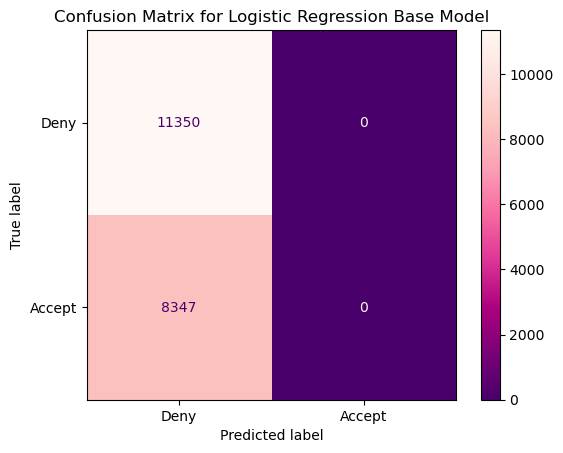

In [71]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(log_reg_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for Logistic Regression Base Model')
plt.show()

In [79]:
# Classification report for base model
print(classification_report(y_test, y_log_reg_test_pred, target_names = target))

              precision    recall  f1-score   support

        Deny       0.58      1.00      0.73     11350
      Accept       0.00      0.00      0.00      8347

    accuracy                           0.58     19697
   macro avg       0.29      0.50      0.37     19697
weighted avg       0.33      0.58      0.42     19697



In [73]:
# Cross Validation Train Logistic Regression Base
recall_train_cross_val_logreg = cross_val_score(log_reg_pipe,
                                    X_train_final,
                                    y_train,
                                    cv=5,
                                    scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val_logreg)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val_logreg.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val_logreg.std())
print('recall Score - Range of Train-Set       : ', (recall_train_cross_val_logreg.mean()-recall_train_cross_val_logreg.std()) , '-', (recall_train_cross_val_logreg.mean()+recall_train_cross_val_logreg.std()))

recall Score - All - Cross Validation  :  [0. 0. 0. 0. 0.]
recall Score - Mean - Cross Validation :  0.0
recall Score - Std - Cross Validation  :  0.0
recall Score - Range of Train-Set       :  0.0 - 0.0


Clearly biased

### KNN Classifier

In [74]:
# Displaying the train and test score for base model
train_test_score('KNN Classifier', knn_class_pipe)

KNN Classifier Base Model Score
Training Score:  0.6952
Testing Score:  0.5205


In [150]:
# Predict using base model
y_knn_class_train_pred = knn_class_pipe.predict(X_train_final)
y_knn_class_test_pred = knn_class_pipe.predict(X_test_final)

# Displaying the metrics
knn_class_accuracy_train, knn_class_accuracy_test, knn_class_recall_train, knn_class_recall_test = metrics_score('KNN Classifier', y_knn_class_train_pred, y_knn_class_test_pred)

KNN Classifier Base Model Score

Accuracy Score
Train Set: 0.695194699700462
Test Set: 0.5205361222521196 

Recall Score
Train Set: 0.5639014126840998
Test Set: 0.3615670300706841


<Figure size 700x700 with 0 Axes>

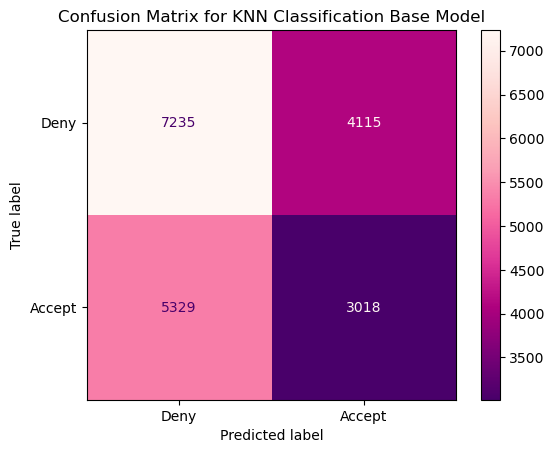

In [76]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(knn_class_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for KNN Classification Base Model')
plt.show()

In [80]:
# Classification report for base model
print(classification_report(y_test, y_knn_class_test_pred, target_names = target))

              precision    recall  f1-score   support

        Deny       0.58      0.64      0.61     11350
      Accept       0.42      0.36      0.39      8347

    accuracy                           0.52     19697
   macro avg       0.50      0.50      0.50     19697
weighted avg       0.51      0.52      0.51     19697



In [81]:
# Cross Validation Train Logistic Regression Base
recall_train_cross_val_knn_class = cross_val_score(knn_class_pipe,
                                    X_train_final,
                                    y_train,
                                    cv=5,
                                    scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val_knn_class)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val_knn_class.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val_knn_class.std())
print('recall Score - Range of Train-Set       : ', (recall_train_cross_val_knn_class.mean()-recall_train_cross_val_knn_class.std()) , '-', (recall_train_cross_val_knn_class.mean()+recall_train_cross_val_knn_class.std()))

recall Score - All - Cross Validation  :  [0.35707845 0.35722873 0.35692816 0.35933273 0.36188759]
recall Score - Mean - Cross Validation :  0.35849113315299064
recall Score - Std - Cross Validation  :  0.001911877835141477
recall Score - Range of Train-Set       :  0.3565792553178492 - 0.3604030109881321


### SVC

In [82]:
# Displaying the train and test score for base model
train_test_score('SVC', svc_pipe)

SVC Base Model Score
Training Score:  0.5777
Testing Score:  0.5762


In [83]:
# Predict using base model
y_svc_train_pred = svc_pipe.predict(X_train_final)
y_svc_test_pred = svc_pipe.predict(X_test_final)

# Displaying the metrics
svc_accuracy_train, svc_accuracy_test, svc_recall_train, svc_recall_test = metrics_score('SVC', y_svc_train_pred, y_svc_test_pred)

SVC Base Model Score

Accuracy Score
Train Set: 0.5777275727268112
Test Set: 0.5762298827232574 

Recall Score
Train Set: 0.0
Test Set: 0.0


<Figure size 700x700 with 0 Axes>

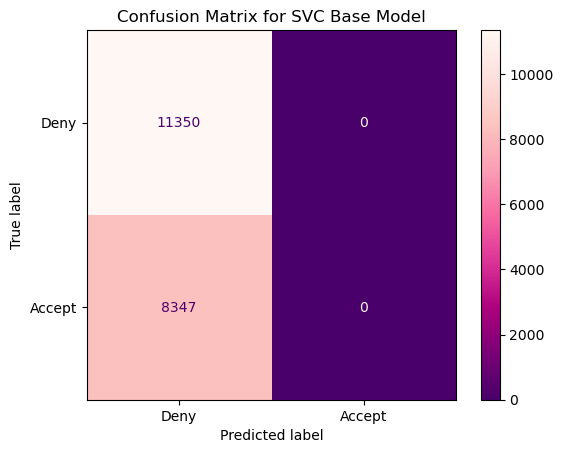

In [84]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(svc_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for SVC Base Model')
plt.show()

In [85]:
# Classification report for base model
print(classification_report(y_test, y_svc_test_pred, target_names = target))

              precision    recall  f1-score   support

        Deny       0.58      1.00      0.73     11350
      Accept       0.00      0.00      0.00      8347

    accuracy                           0.58     19697
   macro avg       0.29      0.50      0.37     19697
weighted avg       0.33      0.58      0.42     19697



In [86]:
# Cross Validation Train Logistic Regression Base
recall_train_cross_val_svc = cross_val_score(svc_pipe,
                                    X_train_final,
                                    y_train,
                                    cv=5,
                                    scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val_svc)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val_svc.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val_svc.std())
print('recall Score - Range of Train-Set       : ', (recall_train_cross_val_svc.mean()-recall_train_cross_val_svc.std()) , '-', (recall_train_cross_val_svc.mean()+recall_train_cross_val_svc.std()))

recall Score - All - Cross Validation  :  [0. 0. 0. 0. 0.]
recall Score - Mean - Cross Validation :  0.0
recall Score - Std - Cross Validation  :  0.0
recall Score - Range of Train-Set       :  0.0 - 0.0


### Decision Tree Classifier

In [87]:
# Displaying the train and test score for base model
train_test_score('Decision Tree Classifier', dt_class_pipe)

Decision Tree Classifier Base Model Score
Training Score:  1.0
Testing Score:  0.5096


In [151]:
# Predict using base model
y_dt_class_train_pred = dt_class_pipe.predict(X_train_final)
y_dt_class_test_pred = dt_class_pipe.predict(X_test_final)

# Displaying the metrics
dt_class_accuracy_train, dt_class_accuracy_test, dt_class_recall_train, dt_class_recall_test = metrics_score('Decision Tree Classifier', y_dt_class_train_pred, y_dt_class_test_pred)

Decision Tree Classifier Base Model Score

Accuracy Score
Train Set: 1.0
Test Set: 0.5096207544296085 

Recall Score
Train Set: 1.0
Test Set: 0.42015095243800166


<Figure size 700x700 with 0 Axes>

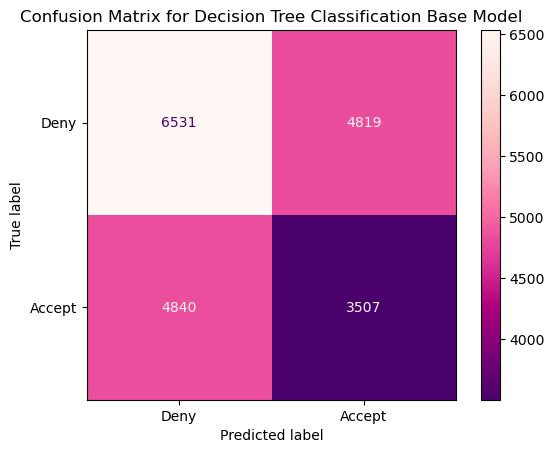

In [89]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(dt_class_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for Decision Tree Classification Base Model')
plt.show()

In [90]:
# Classification report for base model
print(classification_report(y_test, y_dt_class_test_pred, target_names = target))

              precision    recall  f1-score   support

        Deny       0.57      0.58      0.57     11350
      Accept       0.42      0.42      0.42      8347

    accuracy                           0.51     19697
   macro avg       0.50      0.50      0.50     19697
weighted avg       0.51      0.51      0.51     19697



In [116]:
# Cross Validation Train Logistic Regression Base
recall_train_cross_val_dt = cross_val_score(dt_class_pipe,
                                    X_train_final,
                                    y_train,
                                    cv=5,
                                    scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val_dt)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val_dt.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val_dt.std())
print('recall Score - Range of Train-Set       : ', (recall_train_cross_val_dt.mean()-recall_train_cross_val_dt.std()) , '-', (recall_train_cross_val_dt.mean()+recall_train_cross_val_dt.std()))

recall Score - All - Cross Validation  :  [0.42681094 0.43402465 0.43312293 0.42861437 0.42320409]
recall Score - Mean - Cross Validation :  0.42915539525097685
recall Score - Std - Cross Validation  :  0.004016421542167743
recall Score - Range of Train-Set       :  0.4251389737088091 - 0.4331718167931446


### Random Forest Classifier

In [91]:
# Displaying the train and test score for base model
train_test_score('Random Forest Classifier', rf_class_pipe)

Random Forest Classifier Base Model Score


Training Score:  1.0
Testing Score:  0.5397


In [92]:
# Predict using base model
y_rf_class_train_pred = rf_class_pipe.predict(X_train_final)
y_rf_class_test_pred = rf_class_pipe.predict(X_test_final)

# Displaying the metrics
rf_class_accuracy_train, rf_class_accuracy_test, rf_class_recall_train, rf_class_recall_test = metrics_score('Random Forest Classifier', y_rf_class_train_pred, y_rf_class_test_pred)

Random Forest Classifier Base Model Score

Accuracy Score
Train Set: 1.0
Test Set: 0.5397268619586739 

Recall Score
Train Set: 1.0
Test Set: 0.2519468072361327


<Figure size 700x700 with 0 Axes>

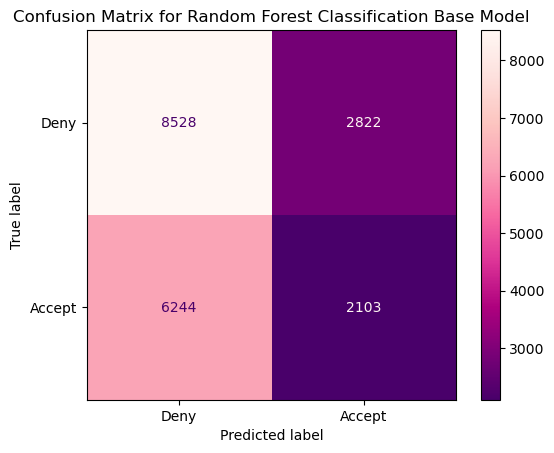

In [93]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(rf_class_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for Random Forest Classification Base Model')
plt.show()

In [94]:
# Classification report for base model
print(classification_report(y_test, y_rf_class_test_pred, target_names = target))

              precision    recall  f1-score   support

        Deny       0.58      0.75      0.65     11350
      Accept       0.43      0.25      0.32      8347

    accuracy                           0.54     19697
   macro avg       0.50      0.50      0.48     19697
weighted avg       0.51      0.54      0.51     19697



In [117]:
# Cross Validation Train Logistic Regression Base
recall_train_cross_val_rf = cross_val_score(rf_class_pipe,
                                    X_train_final,
                                    y_train,
                                    cv=5,
                                    scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val_rf)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val_rf.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val_rf.std())
print('recall Score - Range of Train-Set       : ', (recall_train_cross_val_rf.mean()-recall_train_cross_val_rf.std()) , '-', (recall_train_cross_val_rf.mean()+recall_train_cross_val_rf.std()))

recall Score - All - Cross Validation  :  [0.24316201 0.2391043  0.24150887 0.24376315 0.24827172]
recall Score - Mean - Cross Validation :  0.2431620078148482
recall Score - Std - Cross Validation  :  0.0030221970472496355
recall Score - Range of Train-Set       :  0.24013981076759858 - 0.24618420486209783


### Gradient Boosting Classifier

In [95]:
# Displaying the train and test score for base model
train_test_score('Gradient Boosting Classifier', gbm_class_pipe)

Gradient Boosting Classifier Base Model Score
Training Score:  0.5798
Testing Score:  0.5755


In [96]:
# Predict using base model
y_gbm_class_train_pred = gbm_class_pipe.predict(X_train_final)
y_gbm_class_test_pred = gbm_class_pipe.predict(X_test_final)

# Displaying the metrics
gbm_class_accuracy_train, gbm_class_accuracy_test, gbm_class_recall_train, gbm_class_recall_test = metrics_score('GBM Classifier', y_gbm_class_train_pred, y_gbm_class_test_pred)

GBM Classifier Base Model Score

Accuracy Score
Train Set: 0.5798344925623191
Test Set: 0.5755191145859776 

Recall Score
Train Set: 0.005680793507664562
Test Set: 0.002036659877800407


<Figure size 700x700 with 0 Axes>

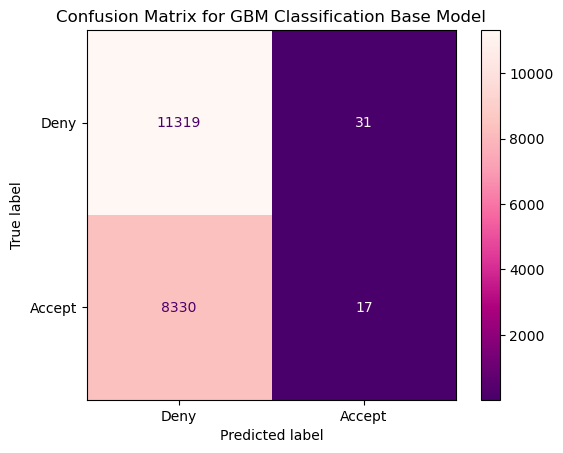

In [97]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(gbm_class_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for GBM Classification Base Model')
plt.show()

In [98]:
# Classification report for base model
print(classification_report(y_test, y_gbm_class_test_pred, target_names = target))

              precision    recall  f1-score   support

        Deny       0.58      1.00      0.73     11350
      Accept       0.35      0.00      0.00      8347

    accuracy                           0.58     19697
   macro avg       0.47      0.50      0.37     19697
weighted avg       0.48      0.58      0.42     19697



In [118]:
# Cross Validation Train Logistic Regression Base
recall_train_cross_val_gbm = cross_val_score(gbm_class_pipe,
                                    X_train_final,
                                    y_train,
                                    cv=5,
                                    scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val_gbm)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val_gbm.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val_gbm.std())
print('recall Score - Range of Train-Set       : ', (recall_train_cross_val_gbm.mean()-recall_train_cross_val_gbm.std()) , '-', (recall_train_cross_val_gbm.mean()+recall_train_cross_val_gbm.std()))

recall Score - All - Cross Validation  :  [0.00465885 0.00375714 0.00225428 0.00300571 0.00270514]
recall Score - Mean - Cross Validation :  0.0032762248271716262
recall Score - Std - Cross Validation  :  0.0008469493720231662
recall Score - Range of Train-Set       :  0.00242927545514846 - 0.004123174199194793


### CatBoost Classifier

In [99]:
# Displaying the train and test score for base model
train_test_score('CatBoost Classifier', cat_boost_class_pipe)

CatBoost Classifier Base Model Score


Training Score:  0.6362
Testing Score:  0.5637


In [100]:
# Predict using base model
y_cat_boost_class_train_pred = cat_boost_class_pipe.predict(X_train_final)
y_cat_boost_class_test_pred = cat_boost_class_pipe.predict(X_test_final)

# Displaying the metrics
cat_boost_class_accuracy_train, cat_boost_class_accuracy_test, cat_boost_class_recall_train, cat_boost_class_recall_test = metrics_score('CatBoost Classifier', y_cat_boost_class_train_pred, y_cat_boost_class_test_pred)

CatBoost Classifier Base Model Score

Accuracy Score
Train Set: 0.6361501751535766
Test Set: 0.5636899020155354 

Recall Score
Train Set: 0.17370003005710852
Test Set: 0.07463759434527376


<Figure size 700x700 with 0 Axes>

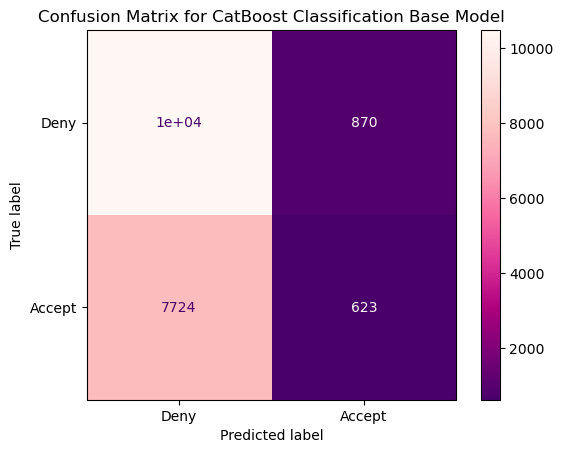

In [101]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(cat_boost_class_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for CatBoost Classification Base Model')
plt.show()

In [102]:
# Classification report for base model
print(classification_report(y_test, y_cat_boost_class_test_pred, target_names = target))

              precision    recall  f1-score   support

        Deny       0.58      0.92      0.71     11350
      Accept       0.42      0.07      0.13      8347

    accuracy                           0.56     19697
   macro avg       0.50      0.50      0.42     19697
weighted avg       0.51      0.56      0.46     19697



In [119]:
# Cross Validation Train Logistic Regression Base
recall_train_cross_val_cat_boost = cross_val_score(cat_boost_class_pipe,
                                    X_train_final,
                                    y_train,
                                    cv=5,
                                    scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val_cat_boost)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val_cat_boost.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val_cat_boost.std())
print('recall Score - Range of Train-Set       : ', (recall_train_cross_val_cat_boost.mean()-recall_train_cross_val_cat_boost.std()) , '-', (recall_train_cross_val_cat_boost.mean()+recall_train_cross_val_cat_boost.std()))

0:	learn: 0.5778042	total: 9.14ms	remaining: 9.13s
1:	learn: 0.5778360	total: 14.6ms	remaining: 7.3s
2:	learn: 0.5781374	total: 20.2ms	remaining: 6.72s
3:	learn: 0.5781215	total: 26.8ms	remaining: 6.68s
4:	learn: 0.5780422	total: 34.2ms	remaining: 6.8s
5:	learn: 0.5780263	total: 39.1ms	remaining: 6.47s
6:	learn: 0.5780581	total: 46.6ms	remaining: 6.61s
7:	learn: 0.5780263	total: 54.2ms	remaining: 6.73s
8:	learn: 0.5779470	total: 61.7ms	remaining: 6.79s
9:	learn: 0.5778360	total: 68.6ms	remaining: 6.79s
10:	learn: 0.5778201	total: 73.1ms	remaining: 6.57s
11:	learn: 0.5777725	total: 80.9ms	remaining: 6.66s
12:	learn: 0.5778201	total: 88.8ms	remaining: 6.74s
13:	learn: 0.5778360	total: 96.5ms	remaining: 6.8s
14:	learn: 0.5778360	total: 104ms	remaining: 6.86s
15:	learn: 0.5779153	total: 113ms	remaining: 6.93s
16:	learn: 0.5779153	total: 121ms	remaining: 7s
17:	learn: 0.5779153	total: 129ms	remaining: 7.02s
18:	learn: 0.5779946	total: 136ms	remaining: 7.04s
19:	learn: 0.5779470	total: 143ms

### XGBoost Classifier

In [110]:
# Displaying the train and test score for base model
train_test_score('XGBoost Classifier', xg_boost_class_pipe)

XGBoost Classifier Base Model Score
Training Score:  0.6413
Testing Score:  0.5611


In [111]:
# Predict using base model
y_xg_boost_class_train_pred = xg_boost_class_pipe.predict(X_train_final)
y_xg_boost_class_test_pred = xg_boost_class_pipe.predict(X_test_final)

# Displaying the metrics
xg_boost_class_accuracy_train, xg_boost_class_accuracy_test, xg_boost_class_recall_train, xg_boost_class_recall_test = metrics_score('XGBoost Classifier', y_xg_boost_class_train_pred, y_xg_boost_class_test_pred)

XGBoost Classifier Base Model Score

Accuracy Score
Train Set: 0.6413286287251866
Test Set: 0.5611006752297304 

Recall Score
Train Set: 0.2079350766456267
Test Set: 0.11129747214568109


<Figure size 700x700 with 0 Axes>

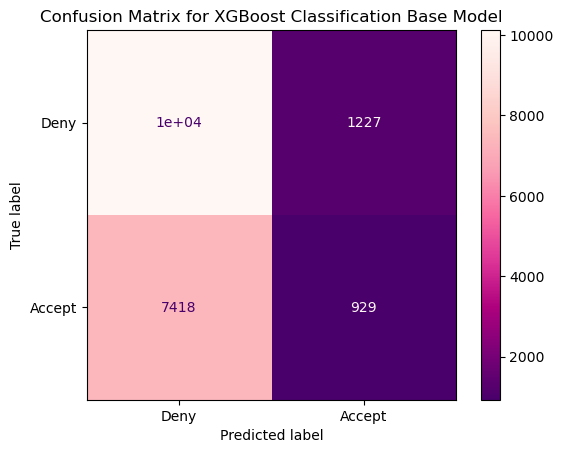

In [112]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(xg_boost_class_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for XGBoost Classification Base Model')
plt.show()

In [113]:
# Classification report for base model
print(classification_report(y_test, y_xg_boost_class_test_pred, target_names = target))

              precision    recall  f1-score   support

        Deny       0.58      0.89      0.70     11350
      Accept       0.43      0.11      0.18      8347

    accuracy                           0.56     19697
   macro avg       0.50      0.50      0.44     19697
weighted avg       0.52      0.56      0.48     19697



In [120]:
# Cross Validation Train Logistic Regression Base
recall_train_cross_val_xg_boost = cross_val_score(xg_boost_class_pipe,
                                    X_train_final,
                                    y_train,
                                    cv=5,
                                    scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val_xg_boost)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val_xg_boost.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val_xg_boost.std())
print('recall Score - Range of Train-Set       : ', (recall_train_cross_val_xg_boost.mean()-recall_train_cross_val_xg_boost.std()) , '-', (recall_train_cross_val_xg_boost.mean()+recall_train_cross_val_xg_boost.std()))

recall Score - All - Cross Validation  :  [0.11797415 0.11241359 0.12143072 0.11466787 0.12128043]
recall Score - Mean - Cross Validation :  0.11755335136759844
recall Score - Std - Cross Validation  :  0.003573384445302684
recall Score - Range of Train-Set       :  0.11397996692229576 - 0.12112673581290112


### All Base Model Comparisons

In [114]:
# Creating dictionary of all the models
model_comparison_dict = {
    'Logistic Regression': [
        log_reg_accuracy_train, log_reg_accuracy_test, '---',
        log_reg_recall_train, log_reg_recall_test
    ], 'KNN Classifier': [
        knn_class_accuracy_train, knn_class_accuracy_test, '---',
        knn_class_recall_train, knn_class_recall_test
    ], 'SVC': [
        svc_accuracy_train, svc_accuracy_test, '---',
        svc_recall_train, svc_recall_test
    ], 'Decision Tree Classifier': [
        dt_class_accuracy_train, dt_class_accuracy_test, '---',
        dt_class_recall_train, dt_class_recall_test
    ], 'Random Forest Classifier': [
        rf_class_accuracy_train, rf_class_accuracy_test, '---',
        rf_class_recall_train, rf_class_recall_test
    ], 'Gradient Boosting Classifier': [
        gbm_class_accuracy_train, gbm_class_accuracy_test, '---',
        gbm_class_recall_train, gbm_class_recall_test
    ], 'CatBoost Classifier': [
        cat_boost_class_accuracy_train, cat_boost_class_accuracy_test, '---',
        cat_boost_class_recall_train, cat_boost_class_recall_test
    ], 'XGBoost Classifier': [
        xg_boost_class_accuracy_train, xg_boost_class_accuracy_test, '---',
        xg_boost_class_recall_train, xg_boost_class_recall_test
    ]
}

pd.DataFrame(model_comparison_dict, index=['Accuracy - Train', 'Accuracy - Test', '---', 'Recall Score - Train', 'Recall Score - Test'])

,Logistic Regression,KNN Classifier,SVC,Decision Tree Classifier,Random Forest Classifier,Gradient Boosting Classifier,CatBoost Classifier,XGBoost Classifier
Accuracy - Train,0.577728,0.695195,0.577728,1.0,1.0,0.579834,0.63615,0.641329
Accuracy - Test,0.57623,0.520536,0.57623,0.509621,0.539727,0.575519,0.56369,0.561101
---,---,---,---,---,---,---,---,---
Recall Score - Train,0.0,0.563901,0.0,1.0,1.0,0.005681,0.1737,0.207935
Recall Score - Test,0.0,0.361567,0.0,0.420151,0.251947,0.002037,0.074638,0.111297


## Hyperparameter Tuning & the Evaluation

### KNN Classifier

In [138]:
# Define the hyperparameter grid
knn_class_param_randomized = {
    'knn_class__n_neighbors': list(np.random.randint(1, 20, size=10)),
    'knn_class__weights': ['uniform', 'distance'],  # Weight function
}

# Defining the grid search for the model
knn_class_random = RandomizedSearchCV(knn_class_pipe, knn_class_param_randomized, cv=5, n_iter=10)

knn_class_random

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('winsoriserIqr',
                                                                               Winsorizer(capping_method='iqr',
                                                                                          fold=1.5,
                                                                                          missing_values='ignore',
                                                                                          tail='both',
                                                                                          variables=['postal_code',
                                                                                                     'annual_mileage',
                                                                                                     'speeding_violations']),
                                                                               ['postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations']),
                                                                              ('winsoriserN...
                                                                                'vehicle_ownership',
                                                                                'married',
                                                                                'children',
                                                                                'postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations',
                                                                                'duis',
                                                                                'past_accidents']),
                                                                              ('encoder',
                                                                               OneHotEncoder(),
                                                                               ['gender',
                                                                                'driving_experience',
                                                                                'type_of_vehicle',
                                                                                'issue'])])),
                                             ('knn_class',
                                              KNeighborsClassifier())]),
                   param_distributions={'knn_class__n_neighbors': [13, 8, 11, 6,
                                                                   18, 12, 10,
                                                                   16, 7, 1],
                                        'knn_class__weights': ['uniform',
                                                               'distance']})

In [139]:
# Modelling with Hyperparameter Tuning using Randomized Search
knn_class_random.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('winsoriserIqr',
                                                                               Winsorizer(capping_method='iqr',
                                                                                          fold=1.5,
                                                                                          missing_values='ignore',
                                                                                          tail='both',
                                                                                          variables=['postal_code',
                                                                                                     'annual_mileage',
                                                                                                     'speeding_violations']),
                                                                               ['postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations']),
                                                                              ('winsoriserN...
                                                                                'vehicle_ownership',
                                                                                'married',
                                                                                'children',
                                                                                'postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations',
                                                                                'duis',
                                                                                'past_accidents']),
                                                                              ('encoder',
                                                                               OneHotEncoder(),
                                                                               ['gender',
                                                                                'driving_experience',
                                                                                'type_of_vehicle',
                                                                                'issue'])])),
                                             ('knn_class',
                                              KNeighborsClassifier())]),
                   param_distributions={'knn_class__n_neighbors': [13, 8, 11, 6,
                                                                   18, 12, 10,
                                                                   16, 7, 1],
                                        'knn_class__weights': ['uniform',
                                                               'distance']})

In [140]:
# Displaying the train and test score for tuned model
train_test_score('KNN Classifier', knn_class_random, True)

Tuned Model Score
Best params for KNN Classifier: {'knn_class__weights': 'uniform', 'knn_class__n_neighbors': 8}


Training Score:  0.6481
Testing Score:  0.5402


In [152]:
# Predict using base model
y_knn_class_tuned_train_pred = knn_class_random.predict(X_train_final)
y_knn_class_tuned_test_pred = knn_class_random.predict(X_test_final)

# Displaying the metrics
knn_class_tuned_accuracy_train, knn_class_tuned_accuracy_test, knn_class_tuned_recall_train, knn_class_tuned_recall_test = metrics_score('KNN Classifier', y_knn_class_tuned_train_pred, y_knn_class_tuned_test_pred, True)

KNN Classifier Tuned Model Score

Accuracy Score
Train Set: 0.6481443874701731
Test Set: 0.5402345534853024 

Recall Score
Train Set: 0.3340547039374812
Test Set: 0.2137294836468192


<Figure size 700x700 with 0 Axes>

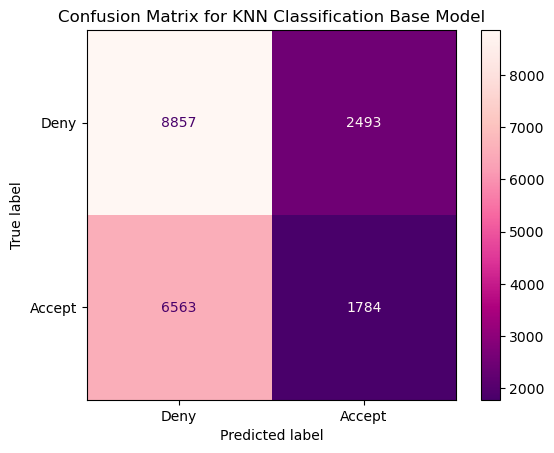

In [143]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(knn_class_random, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for KNN Classification Base Model')
plt.show()

In [144]:
# Classification report for tuned model
print(classification_report(y_test, y_knn_class_test_pred, target_names = target))

              precision    recall  f1-score   support

        Deny       0.57      0.78      0.66     11350
      Accept       0.42      0.21      0.28      8347

    accuracy                           0.54     19697
   macro avg       0.50      0.50      0.47     19697
weighted avg       0.51      0.54      0.50     19697



In [145]:
# Cross Validation Train Logistic Regression Base
recall_train_cross_val_knn = cross_val_score(knn_class_random,
                                    X_train_final,
                                    y_train,
                                    cv=5,
                                    scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val_knn)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val_knn.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val_knn.std())
print('recall Score - Range of Train-Set       : ', (recall_train_cross_val_knn.mean()-recall_train_cross_val_knn.std()) , '-', (recall_train_cross_val_knn.mean()+recall_train_cross_val_knn.std()))

recall Score - All - Cross Validation  :  [0.20243463 0.17523294 0.18319808 0.28088368 0.20483919]
recall Score - Mean - Cross Validation :  0.20931770363691013
recall Score - Std - Cross Validation  :  0.03750500899533603
recall Score - Range of Train-Set       :  0.17181269464157412 - 0.24682271263224614


### Decision Tree Classifier

In [135]:
# Define the hyperparameter grid
dt_class_param_randomized = {
    'dt_class__max_depth': list(np.random.randint(1, 10, size=5)),
    'dt_class__min_samples_split': list(np.random.randint(2, 10, size=5)),
    'dt_class__min_samples_leaf': list(np.random.randint(1, 10, size=5))
}

# Defining the grid search for the model
dt_class_random = RandomizedSearchCV(dt_class_pipe, dt_class_param_randomized, cv=5, n_iter=10)

dt_class_random

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('winsoriserIqr',
                                                                               Winsorizer(capping_method='iqr',
                                                                                          fold=1.5,
                                                                                          missing_values='ignore',
                                                                                          tail='both',
                                                                                          variables=['postal_code',
                                                                                                     'annual_mileage',
                                                                                                     'speeding_violations']),
                                                                               ['postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations']),
                                                                              ('winsoriserN...
                                                                                'children',
                                                                                'postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations',
                                                                                'duis',
                                                                                'past_accidents']),
                                                                              ('encoder',
                                                                               OneHotEncoder(),
                                                                               ['gender',
                                                                                'driving_experience',
                                                                                'type_of_vehicle',
                                                                                'issue'])])),
                                             ('dt_class',
                                              DecisionTreeClassifier())]),
                   param_distributions={'dt_class__max_depth': [9, 2, 8, 4, 6],
                                        'dt_class__min_samples_leaf': [5, 6, 6,
                                                                       3, 6],
                                        'dt_class__min_samples_split': [5, 2, 3,
                                                                        9, 9]})

In [136]:
# Modelling with Hyperparameter Tuning using Randomized Search
dt_class_random.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('winsoriserIqr',
                                                                               Winsorizer(capping_method='iqr',
                                                                                          fold=1.5,
                                                                                          missing_values='ignore',
                                                                                          tail='both',
                                                                                          variables=['postal_code',
                                                                                                     'annual_mileage',
                                                                                                     'speeding_violations']),
                                                                               ['postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations']),
                                                                              ('winsoriserN...
                                                                                'children',
                                                                                'postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations',
                                                                                'duis',
                                                                                'past_accidents']),
                                                                              ('encoder',
                                                                               OneHotEncoder(),
                                                                               ['gender',
                                                                                'driving_experience',
                                                                                'type_of_vehicle',
                                                                                'issue'])])),
                                             ('dt_class',
                                              DecisionTreeClassifier())]),
                   param_distributions={'dt_class__max_depth': [9, 2, 8, 4, 6],
                                        'dt_class__min_samples_leaf': [5, 6, 6,
                                                                       3, 6],
                                        'dt_class__min_samples_split': [5, 2, 3,
                                                                        9, 9]})

In [146]:
# Displaying the train and test score for tuned model
train_test_score('Decision Tree Classifier', dt_class_random, True)

Tuned Model Score
Best params for Decision Tree Classifier: {'dt_class__min_samples_split': 5, 'dt_class__min_samples_leaf': 6, 'dt_class__max_depth': 4}
Training Score:  0.578
Testing Score:  0.5758


In [153]:
# Predict using tuned model
y_dt_class_tuned_train_pred = dt_class_random.predict(X_train_final)
y_dt_class_tuned_test_pred = dt_class_random.predict(X_test_final)

# Displaying the metrics
dt_class_tuned_accuracy_train, dt_class_tuned_accuracy_test, dt_class_tuned_recall_train, dt_class_tuned_recall_test = metrics_score('Decision Tree Classifier', y_dt_class_tuned_train_pred, y_dt_class_tuned_test_pred, True)

Decision Tree Classifier Tuned Model Score

Accuracy Score
Train Set: 0.578044879930954
Test Set: 0.5757729603492918 

Recall Score
Train Set: 0.0025247971145175834
Test Set: 0.0015574457889061938


In [148]:
# Cross Validation Train Logistic Regression Base
recall_train_cross_val_dt = cross_val_score(dt_class_random,
                                    X_train_final,
                                    y_train,
                                    cv=5,
                                    scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val_dt)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val_dt.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val_dt.std())
print('recall Score - Range of Train-Set       : ', (recall_train_cross_val_dt.mean()-recall_train_cross_val_dt.std()) , '-', (recall_train_cross_val_dt.mean()+recall_train_cross_val_dt.std()))

recall Score - All - Cross Validation  :  [0.00270514 0.         0.00045086 0.         0.00135257]
recall Score - Mean - Cross Validation :  0.0009017132551848512
recall Score - Std - Cross Validation  :  0.0010281112940479153
recall Score - Range of Train-Set       :  -0.00012639803886306414 - 0.0019298245492327666


### Base and Tuned Model Comparison

In [154]:
# Creating dictionary of all the models
model_comparison_dict = {
    'KNN Classifier - Base': [
        knn_class_accuracy_train, knn_class_accuracy_test, '---',
        knn_class_recall_train, knn_class_recall_test
    ],'KNN Classifier - Tuned': [
        knn_class_tuned_accuracy_train, knn_class_tuned_accuracy_test, '---',
        knn_class_tuned_recall_train, knn_class_tuned_recall_test
    ], 'Decision Tree Classifier - Base': [
        dt_class_accuracy_train, dt_class_accuracy_test, '---',
        dt_class_recall_train, dt_class_recall_test
    ],  'Decision Tree Classifier - Tuned': [
        dt_class_tuned_accuracy_train, dt_class_tuned_accuracy_test, '---',
        dt_class_tuned_recall_train, dt_class_tuned_recall_test
    ]
}

pd.DataFrame(model_comparison_dict, index=['Accuracy - Train', 'Accuracy - Test', '---', 'Recall Score - Train', 'Recall Score - Test'])

,KNN Classifier - Base,KNN Classifier - Tuned,Decision Tree Classifier - Base,Decision Tree Classifier - Tuned
Accuracy - Train,0.695195,0.648144,1.0,0.578045
Accuracy - Test,0.520536,0.540235,0.509621,0.575773
---,---,---,---,---
Recall Score - Train,0.563901,0.334055,1.0,0.002525
Recall Score - Test,0.361567,0.213729,0.420151,0.001557


# **Model Saving**

In [149]:
# Saving the model
with open('deployment/dt_class_model.pkl', 'wb') as file_1:
    pickle.dump(dt_class_pipe, file_1)

# **Model Inference**

## Load Model

In [155]:
# Load Model
with open('deployment/dt_class_model.pkl', 'rb') as file_1:
  model = pickle.load(file_1)

model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('dt_class', DecisionTreeClassifier())])

## Making Dummy Data

In [157]:
df.head(10)

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,crack,0.0
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,tire flat,1.0
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter,1.0
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,lamp broken,1.0
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter,0.0
5,695325,40-64,female,20-29y,high school,upper class,0.639052,1.0,after 2015,suv,1.0,0.0,10238,17000.0,0,0,0,scratch,1.0
6,398687,26-39,male,20-29y,none,poverty,0.439659,1.0,before 2015,sports car,0.0,1.0,34135,10000.0,1,3,0,lamp broken,1.0
7,702922,40-64,female,30y+,university,upper class,0.752427,1.0,before 2015,sports car,1.0,0.0,10238,12000.0,1,1,0,lamp broken,1.0
8,481986,26-39,male,20-29y,university,upper class,0.802496,1.0,before 2015,sports car,0.0,0.0,10238,11000.0,0,0,0,tire flat,0.0
9,668442,40-64,female,0-9y,high school,upper class,0.361095,1.0,before 2015,sedan,1.0,1.0,10238,13000.0,0,0,0,scratch,0.0


In [158]:
# Making dummy data
data_inf = {
    'id': [1001, 1002, 1003], 
    'age': ['26-39', '60+', '40-64'], 
    'gender': ['female', 'male', 'female'], 
    'driving_experience': ['0-9y', '30y+', '20-29y'], 
    'education': ['university', 'university', 'university'], 
    'income': ['upper class', 'middle class', 'poverty'],
    'credit_score': [0.70, 0.81, 0.49], 
    'vehicle_ownership': [1, 1, 0], 
    'vehicle_year': ['after 2015', 'before 2015', 'before 2015'], 
    'type_of_vehicle': ['sports car', 'sedan', 'suv'],
    'married': [0, 1, 1], 
    'children': [0, 0, 1], 
    'postal_code': [10238, 10238, 10238], 
    'annual_mileage': [17000.0, 15000.0, 7000.0],
    'speeding_violations': [1, 0, 0], 
    'duis': [0, 0, 0], 
    'past_accidents': [0, 0, 0], 
    'issue': ['scratch', 'dent', 'lamp broken']
}

df_inf = pd.DataFrame(data_inf)

df_inf

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue
0,1001,26-39,female,0-9y,university,upper class,0.70,1,after 2015,sports car,0,0,10238,17000.0,1,0,0,scratch
1,1002,60+,male,30y+,university,middle class,0.81,1,before 2015,sedan,1,0,10238,15000.0,0,0,0,dent
2,1003,40-64,female,20-29y,university,poverty,0.49,0,before 2015,suv,1,1,10238,7000.0,0,0,0,lamp broken


## Predict Insurance Claims

In [163]:
# Predict the inference data
y_pred_inf = model.predict(df_inf)
targets = ['Denied', 'Accepted']

print(f'Predicted Insurance Claims on Customer ID - {df_inf.id.loc[0]}: {targets[int(y_pred_inf[0])]}')
print(f'Predicted Insurance Claims on Customer ID - {df_inf.id.loc[1]}: {targets[int(y_pred_inf[1])]}')
print(f'Predicted Insurance Claims on Customer ID - {df_inf.id.loc[2]}: {targets[int(y_pred_inf[2])]}')

Predicted Insurance Claims on Customer ID - 1001: Denied
Predicted Insurance Claims on Customer ID - 1002: Accepted
Predicted Insurance Claims on Customer ID - 1003: Accepted


# **Conclusion**